<div style=float:right><img src="assets/img/appliedai-logo.png" width=100 style="margin: 0px 20px"></img></div>

##### Applied AI Internal Project
# Daft PGM Demo
_Autumn 2016_

This is a very barebones repo to demonstrate usage of `daft-pgm`, a small package for drawing plate notation diagrams purely in Python.

I have found it quite useful for documenting projects that use Bayesian inference, so perhaps others will also find a set of worked examples helpful. This repo accompanies a larger project called **pymc3_vs_pystan** by Jonathan Sedar of Applied AI Ltd, which was written primarily for presentation at the PyData London 2016 Conference.

The package is developed by [Dan Foreman-Mackey](http://dan.iel.fm), and there's lots of info and some demos at the project website [http://daft-pgm.org](http://daft-pgm.org)

>_As per the project_: Daft is a Python package that uses `matplotlib` to render pixel-perfect probabilistic graphical models for publication in a journal or on the internet. With a short Python script and an intuitive model building syntax you can design directed (Bayesian Networks, directed acyclic graphs) and undirected (Markov random fields) models and save them in any formats that `matplotlib` supports (including PDF, PNG, EPS and SVG).


Applied AI Ltd &copy; 2016

---

    
# 00_DaftPGMDemo


Here we demonstrate drawing plate notation diagrams for a set of hierarchical linear models.


+ [Setup](#Setup)


+ [Pooled Model](#Pooled-Model)


+ [Unpooled Model](#Unpooled-Model)


+ [Fully Unpooled Model](#Fully Unpooled-Model)


+ [Partial-Pooled Model](#Partial-Pooled-Model)


+ [Hierarchical Model](#Hierarchical-Model)

# Setup

In [1]:
%matplotlib inline
%qtconsole --colors=linux  
%load_ext watermark
# %connect_info

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rc
import daft

# filter warnings for presentation's sake
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 14, 8
rc("font", family="serif", size=12)
rc("text", usetex=False)

%watermark -dmvgp numpy,pandas,matplotlib,daft

2016-09-05 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.1
daft 0.0.4

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 14.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
Git hash   : HEAD


---

# Pooled Model

Pool (ignore) the `parent` and `mfr` features.

$$y \sim \mathcal{N}(\beta^{T} \bf{x},\epsilon)$$

where:  
$\beta$ are our coeffs in the linear model  
$\bf{x}$ is the vector of features describing each car in the dataset  
$\epsilon \sim \mathcal{HalfCauchy}(0, 10)$ 

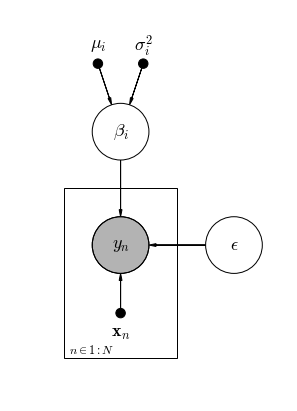

In [6]:
# create the PGM layout
pgm = daft.PGM(shape=[2.5, 3.5], origin=[0, 0], grid_unit=4,
               label_params={'fontsize':18}, observed_style='shaded')

# prior latent vars
pgm.add_node(daft.Node("beta", r"$\beta_{i}$", 1, 2.4, scale=2))
pgm.add_node(daft.Node("beta_mu", r"$\mu_{i}$", 0.8, 3, scale=2,
                       fixed=True, offset=(0,10)))
pgm.add_node(daft.Node("beta_sd", r"$\sigma_{i}^{2}$", 1.2, 3, scale=2,
                       fixed=True, offset=(0,6)))



# fixed exog variables
pgm.add_node(daft.Node("x", r"$\mathbf{x}_{n}$", 1, 0.8, scale=2, fixed=True, offset=(0,-30)))

# observed data with latent noise
pgm.add_node(daft.Node("y", r"$y_n$", 1, 1.4, scale=2, observed=True))
pgm.add_node(daft.Node("epsilon", r"$\epsilon$", 2, 1.4, scale=2))

# draw directed edges
pgm.add_edge("beta_mu", "beta")
pgm.add_edge("beta_sd", "beta")
pgm.add_edge("beta", "y")
pgm.add_edge("x", "y")
pgm.add_edge("epsilon", "y")

# draw plate
pgm.add_plate(daft.Plate([0.5, 0.5, 1, 1.4], label=r"$n \in 1:N$", shift=-0.1))

pgm.render()
plt.show()

---

# Unpooled Model

Each `mfr` value gets a separate intercept with shared slopes.


$$y \sim \mathcal{N}(\beta_{mfr} + \beta^{T} \bf{x},\epsilon)$$

where:  
$\beta_{mfr}$ is a separate intercept for each manufacturer  
$\beta$ are our (shared) coeffs in the linear model  
$\bf{x}$ is the vector of features describing each car in the dataset  
$\epsilon \sim \mathcal{HalfCauchy}(0, 10)$ 

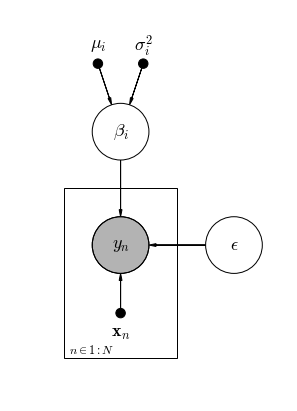

In [7]:
# create the PGM layout
pgm = daft.PGM(shape=[2.5, 3.5], origin=[0, 0], grid_unit=4,
               label_params={'fontsize':18}, observed_style='shaded')

# prior latent vars
pgm.add_node(daft.Node("beta", r"$\beta_{i}$", 1, 2.4, scale=2))
pgm.add_node(daft.Node("beta_mu", r"$\mu_{i}$", 0.8, 3, scale=2,
                       fixed=True, offset=(0,10)))
pgm.add_node(daft.Node("beta_sd", r"$\sigma_{i}^{2}$", 1.2, 3, scale=2,
                       fixed=True, offset=(0,6)))



# fixed exog variables
pgm.add_node(daft.Node("x", r"$\mathbf{x}_{n}$", 1, 0.8, scale=2, fixed=True, offset=(0,-30)))

# observed data with latent noise
pgm.add_node(daft.Node("y", r"$y_n$", 1, 1.4, scale=2, observed=True))
pgm.add_node(daft.Node("epsilon", r"$\epsilon$", 2, 1.4, scale=2))

# draw directed edges
pgm.add_edge("beta_mu", "beta")
pgm.add_edge("beta_sd", "beta")
pgm.add_edge("beta", "y")
pgm.add_edge("x", "y")
pgm.add_edge("epsilon", "y")

# draw plate
pgm.add_plate(daft.Plate([0.5, 0.5, 1, 1.4], label=r"$n \in 1:N$", shift=-0.1))

pgm.render()
plt.show()

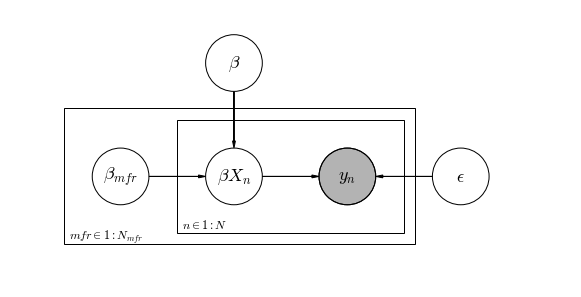

In [8]:


# create the PGM
pgm = daft.PGM(shape=[5, 2.5], origin=[0, 0], grid_unit=4,
               label_params={'fontsize':18})

# priors
pgm.add_node(daft.Node("beta_mfr", r"$\beta_{mfr}$", 1, 1, scale=2))
pgm.add_node(daft.Node("beta", r"$\beta$", 2, 2, scale=2))

# latent variable.
pgm.add_node(daft.Node("mu", r"$\beta X_{n}$", 2, 1, scale=2))

# noise
pgm.add_node(daft.Node("epsilon", r"$\epsilon$", 4, 1, scale=2))

# observed data
pgm.add_node(daft.Node("y", r"$y_n$", 3, 1, scale=2, observed=True))

# edges
pgm.add_edge("beta_mfr", "mu")
pgm.add_edge("beta", "mu")
pgm.add_edge("mu", "y")
pgm.add_edge("epsilon", "y")

# plates
pgm.add_plate(daft.Plate([1.5, 0.6, 2, 0.9],
        label=r"$n \in 1:N$", shift=-0.1))

pgm.add_plate(daft.Plate([0.5, 0.5, 3.1, 1.1],
        label=r"$mfr \in 1:N_{mfr}$", shift=-0.1))

pgm.render()
plt.show()

# Fully Unpooled Model

Of course, we can take this unpooling to an extreme, calculating separate intercepts and slopes for each manufacturer:

$$y \sim \mathcal{N}(\beta_{mfr}^{T} \bf{x},\epsilon)$$

where:  
$\beta_{mfr}$ are separate coeffs for each manufucturer
$\bf{x}$ is the vector of features describing each car in the dataset  
$\epsilon \sim \mathcal{HalfCauchy}(0, 10)$ 



# Partially-Pooled Model



Here we place partial-pooling on intercept only: this hyperparameter lets us - in a balanced way - determine a difference between manufacturers `mfr` $m \in manufacturer$, keeping all other features constant

$$y \sim \mathcal{N}(\beta_{mfr} + \beta^{T} \bf{x}, \epsilon)$$

where (tree written upside down):  
$\beta_{mfr} \sim \mathcal{N}(\mu_{mfr}, \sigma_{mfr})$

$\;\;\;\;\;\;\;\;\;\;\;\;|\_\_ \mu_{mfr} \sim \mathcal{N}(0, 100) \;\;;\;\;
\sigma_{mfr} \sim \mathcal{HalfCauchy}(0, 10)$ 

$\beta$ are the other (shared) coeffs in the linear model  
$\bf{x}$ is the vector of features describing each car in the dataset  
$\epsilon \sim \mathcal{HalfCauchy}(0, 10)$ 

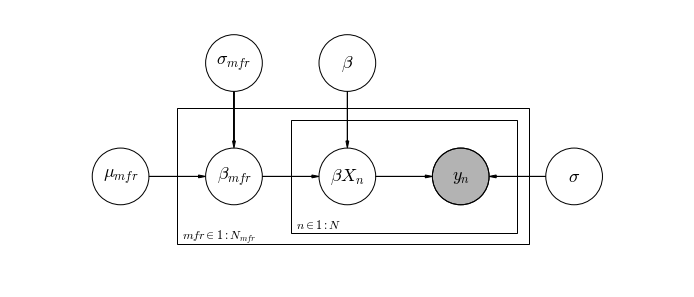

In [9]:
# create the PGM
pgm = daft.PGM(shape=[6, 2.5], origin=[0, 0], grid_unit=4,
               label_params={'fontsize':18})

# priors
pgm.add_node(daft.Node("beta_mfr_mu", r"$\mu_{mfr}$", 1, 1, scale=2))
pgm.add_node(daft.Node("beta_mfr_sd", r"$\sigma_{mfr}$", 2, 2, scale=2))
pgm.add_node(daft.Node("beta_mfr", r"$\beta_{mfr}$", 2, 1, scale=2))
pgm.add_node(daft.Node("beta", r"$\beta$", 3, 2, scale=2))

# latent variable.
pgm.add_node(daft.Node("mu", r"$\beta X_{n}$", 3, 1, scale=2))

# noise
pgm.add_node(daft.Node("sigma", r"$\sigma$", 5, 1, scale=2))

# observed data
pgm.add_node(daft.Node("y", r"$y_n$", 4, 1, scale=2, observed=True))

# edges
pgm.add_edge("beta_mfr_mu", "beta_mfr")
pgm.add_edge("beta_mfr_sd", "beta_mfr")
pgm.add_edge("beta_mfr", "mu")
pgm.add_edge("beta", "mu")
pgm.add_edge("mu", "y")
pgm.add_edge("sigma", "y")

# plates
pgm.add_plate(daft.Plate([2.5, 0.6, 2, 0.9],
        label=r"$n \in 1:N$", shift=-0.1))

pgm.add_plate(daft.Plate([1.5, 0.5, 3.1, 1.1],
        label=r"$mfr \in 1:N_{mfr}$", shift=-0.1))

pgm.render()
plt.show()

---

# Two-level Hierarchical Model

Now's the time to consider it: because the parent company may provide important information. 

$$y \sim \mathcal{N}(\beta_{mfr} + \beta^{T} \bf{x}, \epsilon)$$



where (tree written upside down):  
$\beta_{mfr} \sim \mathcal{N}(\mu_{mfr}, \sigma_{mfr})$

$\;\;\;\;|\_\_ \mu_{mfr} \sim \mathcal{N}(\mu_{parent}, \sigma_{parent}) \;\; ; \;\;
\sigma_{mfr} \sim \mathcal{HalfCauchy}(0, 10)$ 

$\;\;\;\;\;\;\;\;\;\;|\_\_  \mu_{parent} \sim \mathcal{N}(0, 10) \;\; ; \;\; \sigma_{parent}\sim \mathcal{HalfCauchy}(0, 10)$  


$\beta$ are the other (shared) coeffs in the linear model  
$\bf{x}$ is the vector of features describing each car in the dataset  
$\epsilon \sim \mathcal{HalfCauchy}(0, 10)$ 

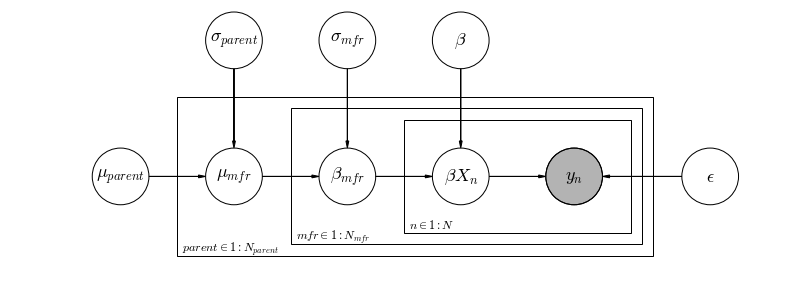

In [10]:
# create the PGM
pgm = daft.PGM(shape=[7, 2.5], origin=[0, 0], grid_unit=4,
               label_params={'fontsize':18})

# priors
pgm.add_node(daft.Node("beta_parent_mu", r"$\mu_{parent}$", 1, 1, scale=2))
pgm.add_node(daft.Node("beta_parent_sd", r"$\sigma_{parent}$", 2, 2.2, scale=2))
pgm.add_node(daft.Node("beta_mfr_mu", r"$\mu_{mfr}$", 2, 1, scale=2))
pgm.add_node(daft.Node("beta_mfr_sd", r"$\sigma_{mfr}$", 3, 2.2, scale=2))
pgm.add_node(daft.Node("beta_mfr", r"$\beta_{mfr}$", 3, 1, scale=2))
pgm.add_node(daft.Node("beta", r"$\beta$", 4, 2.2, scale=2))

# latent variable.
pgm.add_node(daft.Node("mu", r"$\beta X_{n}$", 4, 1, scale=2))

# noise
pgm.add_node(daft.Node("epsilon", r"$\epsilon$", 6.2, 1, scale=2))

# observed data
pgm.add_node(daft.Node("y", r"$y_n$", 5, 1, scale=2, observed=True))

# edges
pgm.add_edge("beta_parent_mu", "beta_mfr_mu")
pgm.add_edge("beta_parent_sd", "beta_mfr_mu")
pgm.add_edge("beta_mfr_mu", "beta_mfr")
pgm.add_edge("beta_mfr_sd", "beta_mfr")
pgm.add_edge("beta_mfr", "mu")
pgm.add_edge("beta", "mu")
pgm.add_edge("mu", "y")
pgm.add_edge("epsilon", "y")

# plates
pgm.add_plate(daft.Plate([3.5, 0.6, 2, 0.9],
        label=r"$n \in 1:N$", shift=-0.1))

pgm.add_plate(daft.Plate([2.5, 0.5, 3.1, 1.1],
        label=r"$mfr \in 1:N_{mfr}$", shift=-0.1))

pgm.add_plate(daft.Plate([1.5, 0.4, 4.2, 1.3],
        label=r"$parent \in 1:N_{parent}$", shift=-0.1))

pgm.render()
plt.show()

---
**Applied AI Ltd &copy; 2016**  
<a href='http://www.applied.ai'>applied.ai</a>